# ProShares Replication

## HBS Case

### *ProShares Hedge Replication ETF*

---

# 1. READING - The ProShares ETF Product

### 1. Alternative ETFs

Describe the two types of investments referenced by this term.

Alternative Asset Classes: Investments that provide exposure to non-traditional, real, hard, or financial assets outside the mainstream equity and bond markets. 

e.g. Real estate (REITs, property funds), Commodities (gold, oil, agriculture), Precious metals (gold, silver), Currencies (foreign exchange exposure), Volatility (VIX-linked products), Private equity (when accessible via liquid vehicles)

Alternative Strategies: Investment approaches that use unconventional methods and techniques not constrained by traditional long-only mandates.

e.g. Geared Investing: 
- Leveraged investing (2× or 3× daily returns)
- Inverse investing (short exposure, benefits when markets fall)

Hedge Fund Strategies:
- Market neutral (zero or low correlation to equity markets)
- Absolute return (targeting positive returns regardless of market direction)
- Convertible/merger arbitrage
- Managed futures
- Global macro

### 2. Hedge Funds.

* a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

* b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

a. Measure 1: Superior Risk-Adjusted Returns (Sharpe Ratio)

From Slide 9

| Investment | Return | Volatility (Std Dev) | **Sharpe Ratio** |
|------------|---------|---------------------|------------------|
| **HFRI (Hedge Funds)** | 8.83% | 6.90% | **0.84** |
| S&P 500 (Stocks) | 9.21% | 15.22% | 0.41 |
| Barclays U.S. Agg (Bonds) | 5.74% | 3.69% | 0.76 |

From Slide 7

Adding 20% hedge fund allocation to a 60/40 portfolio (reducing equities from 60% to 40%):
- **Kept returns roughly the same** (~8-8.5% annualized)
- **Reduced risk by 20-40%** (or 200 basis points of volatility)
- Moved the portfolio **up and to the left** on the efficient frontier

Measure 2: Downside Protection

Slide 10
| Year | S&P 500 | HFRI | Barclays Agg |
|------|---------|------|--------------|
| **2008** | **-37%** | **-19%** | +5% |
| 2009 | -8% | -4% | ~0% |
| 2010 | -16% | -7% | ~0% |
| 2011 | -19% | -5% | +8% |

b. 

| Feature | Individual Hedge Funds | HDG ETF | Winner |
|---------|----------------------|---------|--------|
| **Minimum Investment** | $500K - $5M+ | Cost of 1 share (~$25) | ETF |
| **Investor Requirements** | Accredited only | Anyone | ETF |
| **Liquidity** | Lock-ups, gates, quarterly redemptions | Daily trading | ETF |
| **Transparency** | Black box, delayed disclosure | Daily holdings publication | ETF |
| **Fees** | 2% + 20% performance (~3-4% total) | 0.95% | ETF |
| **Regulation** | Light touch | 1940 Act (like mutual funds) | ETF |
| **Tax Reporting** | K-1 (complex, delayed) | 1099 (simple, timely) | ETF |
| **Diversification** | Single or few managers | 2,000+ fund replication | ETF |

### 3. The Benchmarks

* a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

* b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

* c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

* d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

a. 

```
HFRI (Target) → MLFM (Replicator) → MLFM-ES (Tradable Version) → HDG (Actual ETF)
    ↓                ↓                        ↓                          ↓
Real hedge      Statistical          Exchange-tradable            Fund you can
fund returns    replication          benchmark index              actually buy
```

b. Direct Evidence (from Slide 18):
- **Correlation: ~0.90** (90%)
- Visual tracking shows periods of divergence (2008 positive error, 2012-2013 negative error)

Indirect Evidence (from Slide 21):
- Both have similar equity exposure (β ≈ 0.33-0.34)
- Both correlate highly with S&P 500 (~0.83-0.87)
- **But**: MLFM is slightly MORE equity-like and MORE bond-like than HFRI
- **Implication**: MLFM **over-represents traditional asset betas** and **under-represents alternative risk premiums**

The Problem This Reveals:

The factor model treats hedge funds as:
> **33% equities + 26% bonds + other traditional factors**

But real hedge funds are:
> **34% equity exposure + 7% bond exposure + 59% OTHER STUFF**

That "other stuff" includes:
- Manager skill (alpha)
- Illiquidity premiums
- Credit spreads
- Volatility harvesting
- Event-driven strategies
- Non-linear payoffs

The 10% missing correlation likely comes from MLFM's inability to capture that "other stuff"               

c. S&P500

![image.png](../../img/slide19.png)

d. By the time the model identifies what worked for hedge funds, those strategies may have changed

Dominance of Traditional Equity Beta - Missing "Alternative" in Alternatives

### 4. The HDG Product

* a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

* b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

* c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `May 2025`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pandas as pd
from sklearn.linear_model import LinearRegression

from finm367.utils import load_path, concat_with_labels, only_numeric
from finm367.metrics import calc_moment, calc_reg_metrics_batch

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [2]:
file_name = "proshares_analysis_data_ta.xlsx"
file_path = load_path(file_name)
df_pandas = pd.read_excel(file_path, sheet_name="hedge_fund_series", index_col=0)
df_pandas.head(5)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027033,-0.006492
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
2011-10-31,0.026858,0.043593,0.043320,0.050531,0.025244
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
2011-12-31,-0.004479,0.001938,0.001796,0.012874,0.001818


In [3]:
df_polars = pl.from_pandas(df_pandas.reset_index()).rename({"index": "Date"}).drop_nulls()
df_polars.tail()

Date,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
datetime[ns],f64,f64,f64,f64,f64
2025-04-30 00:00:00,-0.0028,-0.004544,-0.005224,-0.00775,-0.002555
2025-05-31 00:00:00,0.0223,0.019974,0.019702,0.018973,0.019302
2025-06-30 00:00:00,0.0233,0.011474,0.010798,0.010599,0.015305
2025-07-31 00:00:00,0.0097,0.012114,0.011396,0.009106,0.006813
2025-08-31 00:00:00,0.0221,0.013347,0.013024,0.013858,0.015052


In [4]:
des = df_polars.select(pl.col(pl.Float64)).describe()
des

statistic,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
str,f64,f64,f64,f64,f64
"""count""",169.0,169.0,169.0,169.0,169.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",0.004273,0.003136,0.00297,0.002164,0.002308
"""std""",0.016973,0.015963,0.015925,0.016586,0.014374
"""min""",-0.090784,-0.053234,-0.052384,-0.05918,-0.056348
"""25%""",-0.004479,-0.004588,-0.004926,-0.0061,-0.006472
"""50%""",0.004792,0.003739,0.003605,0.003321,0.002609
"""75%""",0.0132,0.012375,0.01232,0.011596,0.01128
"""max""",0.058602,0.058886,0.058805,0.058304,0.039788


In [5]:
monthly_ret = df_polars.select(pl.col(pl.Float64))
mean = monthly_ret.mean() * 12
vol = monthly_ret.std() * np.sqrt(12)
sharpe = mean / vol

In [6]:
concat_with_labels([mean, vol, sharpe], labels=["mean", "vol", "sharpe"], label_col="statistic")

statistic,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
str,f64,f64,f64,f64,f64
"""mean""",0.051279,0.037629,0.035646,0.025973,0.027692
"""vol""",0.058796,0.055298,0.055166,0.057457,0.049792
"""sharpe""",0.872151,0.680474,0.646154,0.452046,0.556153


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

**Skewness**

$$
\varsigma=\frac{1}{\sigma^{3}} E\left[(r-\mu)^{3}\right]
$$

**Excess Kurtosis**

$$ \kappa=\frac{1}{\sigma^{4}} E\left[(r-\mu)^{4}\right] $$

In [7]:
def moment_metrics(data, metric: str="skewness") -> pl.DataFrame:
    """
    Calculate skewness/excess kurtosis based on monthly returns

    Args:
        data: monthly return
        metric: "skewness" or "kurtosis"
    Return:
        skewness/excess kurtosis (in excess of 3)
    """
    if metric == "skewness":
        m = 3
    elif metric == "kurtosis":
        m = 4

    # result list
    r_list = []
    names = data.schema.names()
    mean, vol = data.mean(), data.std()

    for name in names:
        # decentralized return
        dec_ret = data[name] - mean[name]
        n = data[name].len()
        r = (1 / vol[name] ** m / (n - 1)) * np.sum(dec_ret.to_numpy() ** m)
        r_list.append(r.to_numpy()[0])
    
    if metric == "kurtosis":
        r_list = [x-3 for x in r_list]
    
    result = pl.DataFrame({
        "tickers": names,
        metric: r_list
    })
    return result

In [8]:
moment_metrics(monthly_ret, metric="skewness")

tickers,skewness
str,f64
"""HFRIFWI Index""",-0.93705
"""MLEIFCTR Index""",-0.276214
"""MLEIFCTX Index""",-0.259916
"""HDG US Equity""",-0.261356
"""QAI US Equity""",-0.420145


In [9]:
moment_metrics(monthly_ret, metric="kurtosis")

tickers,kurtosis
str,f64
"""HFRIFWI Index""",5.406024
"""MLEIFCTR Index""",1.521386
"""MLEIFCTX Index""",1.480591
"""HDG US Equity""",1.660411
"""QAI US Equity""",1.363076


In [10]:
# Use package
calc_moment(monthly_ret, m=3)

HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
f64,f64,f64,f64,f64
-0.948272,-0.279521,-0.263028,-0.264486,-0.425177


In [11]:
calc_moment(monthly_ret, m=4)

HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
f64,f64,f64,f64,f64
5.657351,1.631463,1.589185,1.775543,1.467397


**VaR (.05) - the fifth quantile of historic returns**

**CVaR (.05) - the mean of the returns at or below the fifth quantile**

$$
r^{\mathrm{CVaR}_{q, 1}}=\frac{1}{q N} \sum_{i=1}^{q N} r_{(i)} 
$$

In [12]:
def var_cvar(data, a=0.05):
    """
    Calculate var/cvar based on monthly returns

    Args:
        data: monthly return
        a: percentile
    Return:
        var(.05) / cvar(.05)
    """
    names = data.schema.names()
    var_list = []
    cvar_list = []
    for name in names:
        var = data[name].quantile(a)
        var_list.append(var)
        cvar = data[name].filter(data[name].le(var)).mean()
        cvar_list.append(cvar)
    result = pl.DataFrame({
        "tickers": names,
        "var": var_list,
        "cvar": cvar_list
    })
    return result

In [13]:
var_cvar(monthly_ret)

tickers,var,cvar
str,f64,f64
"""HFRIFWI Index""",-0.0241,-0.035992
"""MLEIFCTR Index""",-0.028081,-0.034993
"""MLEIFCTX Index""",-0.027903,-0.034937
"""HDG US Equity""",-0.030883,-0.036831
"""QAI US Equity""",-0.017386,-0.030995


**Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period**

## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [14]:
from finm367.utils import print_sheetname
print_sheetname(file_path)

['descriptions', 'hedge_fund_series', 'merrill_factors', 'other_data']

In [29]:
mer_fac = pl.read_excel(file_path, sheet_name="merrill_factors")
align_mer = mer_fac[:-1]
align_mer.tail()

__UNNAMED__0,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,f64,f64,f64,f64,f64,f64
2025-04-30,-0.00867,0.003572,0.001372,0.036951,-0.087388,-0.023209
2025-05-31,0.062845,0.003611,0.040219,0.047905,0.001019,0.052397
2025-06-30,0.051387,0.003576,0.070012,0.023967,-0.067843,0.055183
2025-07-31,0.023032,0.003614,0.006633,-0.02092,0.069505,0.016683
2025-08-31,0.020519,0.003449,0.026771,0.045247,-0.045253,0.071926


In [30]:
align_df = pl.concat([monthly_ret, pl.DataFrame(align_mer["SPY US Equity"])], how="horizontal")

In [31]:
calc_reg_metrics_batch(align_df, X="SPY US Equity", y_cols=monthly_ret.columns, freq=12)

X,y,beta,alpha,info_ratio,treynor,r_squared
str,str,f64,f64,f64,f64,f64
"""SPY US Equity""","""HFRIFWI Index""",0.346312,0.001733,0.055336,0.148072,0.716217
"""SPY US Equity""","""MLEIFCTR Index""",0.342103,-0.011315,-0.446645,0.109993,0.790132
"""SPY US Equity""","""MLEIFCTX Index""",0.341126,-0.013159,-0.519776,0.104494,0.789407
"""SPY US Equity""","""HDG US Equity""",0.350231,-0.024134,-0.870311,0.07416,0.767075
"""SPY US Equity""","""QAI US Equity""",0.300703,-0.015329,-0.619398,0.09209,0.752957


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

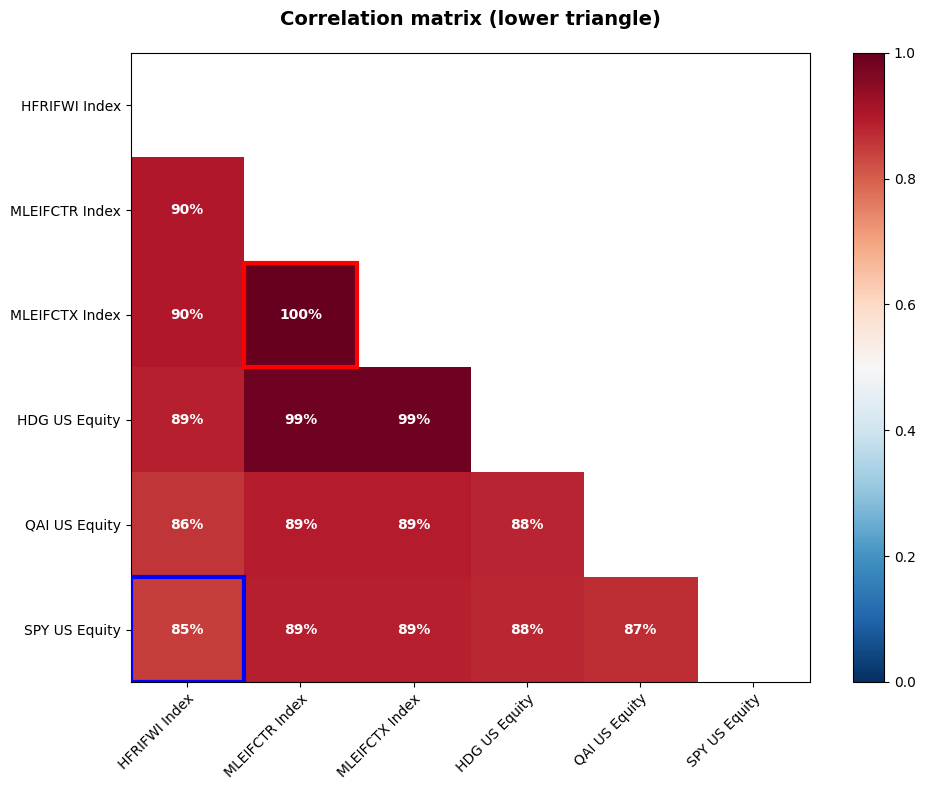

In [33]:
from finm367.plot_tools import plot_corr

fig, ax = plot_corr(align_df.corr(), labels=align_df.columns)

In [26]:
help(plot_corr)

Help on function plot_corr in module finm367.plot_tools:

plot_corr(corr_matrix: polars.dataframe.frame.DataFrame, labels: Optional[List[str]], figsize: Tuple[int] = (10, 8), cmap: str = 'RdBu_r', annot: bool = True, fmt: str = '.0%', title: str = 'Correlation matrix (lower triangle)')
    Plot a correlation matrix with circles highlighting max and min correlations.

    Parameters:
    -----------
    corr_matrix : array-like
        Correlation matrix (can be full or lower triangular)
    labels : list, optional
        List of labels for the axes
    figsize : tuple, optional
        Figure size (width, height)
    cmap : str, optional
        Colormap name
    annot : bool, optional
        Whether to annotate cells with values
    fmt : str, optional
        Format string for annotations (e.g., '.0%' for percentages)
    title : str, optional
        Plot title



## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$$\begin{align}
r^{\text{hfri}}_{t} &= \alpha^{\text{merr}} + x_{t}^{\text{merr}}\beta^{\text{merr}} + \epsilon_{t}^{\text{merr}}\\[5pt]
\hat{r}^{\text{hfri}}_{t} &= \hat{\alpha}^{\text{merr}} + x_{t}^{\text{merr}}\hat{\beta}^{\text{merr}}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.

b. Are the betas realistic position sizes, or do they require huge long-short positions?

c. Report the R-squared.

d. Report the volatility of $\epsilon^{\text{merr}}$, the tracking error.

In [96]:
from finm367.utils import *
from dataclasses import dataclass
target = monthly_ret["HFRIFWI Index"]
factors = only_numeric(align_mer)

@dataclass
class OLSReplication:
    X: List[str]
    y: str
    alpha: float
    betas: pl.Series
    residuals: pl.Series
    r2: float
    tracking_error_ann: float


def ols_replicate(target: pl.Series, factors: pl.DataFrame, freq: int) -> OLSReplication:
    """
    Parameters
    ----------
    target: pl.Series
    factors: pl.Series|pl.DataFrame

    Returns
    -------

    """
    # Transform to numpy
    y_data = target.to_numpy()
    y_mean = np.mean(y_data)
    if factors.shape[1] > 1:
        X_data = factors.to_numpy()
    else:
        X_data = factors.to_numpy().reshape(-1, 1)

    model = LinearRegression().fit(X_data, y_data)
    alpha = model.intercept_
    beta = model.coef_
    y_pred = model.predict(X_data)
    res = y_pred - y_data
    # r squared
    ss_tot = np.sum((y_data - y_mean) ** 2)
    ss_res = np.sum(res ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    # tracking error
    te = np.std(res, ddof=1) * np.sqrt(freq)

    return OLSReplication(X=factors.columns, y=target.name, alpha=alpha,
                          betas=beta, residuals=res, r2=r_squared, tracking_error_ann=te)

In [105]:
ols_replicate(target, factors, freq=12).betas

array([0.04350278, 0.3249306 , 0.08556408, 0.0739944 , 0.02961414,
       0.14582428])

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\text{merr}}_{t}$ and $\tilde{\beta}^{\text{merr}}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\text{merr}}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\text{hfri}}_{t} \equiv \tilde{\alpha}^{\text{merr}} + (x_{t}^{\text{merr}})'\tilde{\beta}^{\text{merr}}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [106]:
y_data = target.to_numpy()
y_mean = np.mean(y_data)
if factors.shape[1] > 1:
    X_data = factors.to_numpy()
else:
    X_data = factors.to_numpy().reshape(-1, 1)

In [108]:
y_data.shape, X_data.shape

((169,), (169, 6))

In [143]:
target_df = target.to_frame() if isinstance(target, pl.Series) else target
concat_df = pl.concat([target_df, factors], how="horizontal")
t_name = target_df.columns[0]
window = 60
dates = df_polars["Date"]
cols = factors.columns
oos = []

for i in range(window, concat_df.shape[0]):
    train = concat_df[i-window: i]
    test = concat_df[i: i+1]
    y_train = train[t_name]
    X_train = train[cols].to_numpy()
    model = LinearRegression().fit(X_train, y_train)
    X_test = test[cols].to_numpy()
    oos.append(model.predict(X_test)[0])


In [145]:
len(oos)

109

In [161]:
np.array(oos)

array([ 0.00496643,  0.00500093, -0.00444873,  0.01165047,  0.00765007,
        0.00950569,  0.01090168,  0.00718207,  0.00557485,  0.0052661 ,
        0.0038369 ,  0.0071466 ,  0.00100149,  0.01100632,  0.00768087,
        0.00634115,  0.00499314,  0.01799316, -0.01018007, -0.00150172,
        0.00302216,  0.00609726, -0.00164144,  0.01182294,  0.00242947,
        0.00047912, -0.02729255,  0.00617063, -0.02697871,  0.02776996,
        0.00875776,  0.00244987,  0.01147585, -0.02227188,  0.02222476,
       -0.00010835, -0.00862836,  0.00941009,  0.00993869,  0.00879415,
        0.01328345, -0.00925108, -0.02391718, -0.05370421,  0.03712907,
        0.01868769,  0.01400617,  0.01431127,  0.01947969, -0.01023721,
       -0.00111083,  0.05369423,  0.02526516,  0.01024734,  0.01536601,
        0.01074863,  0.0113665 ,  0.00815399,  0.00742131, -0.00689269,
        0.01127059, -0.01197481,  0.01790058, -0.01326954,  0.01435399,
       -0.02005422, -0.0037237 ,  0.00292521, -0.03092425,  0.00

In [163]:
np.corrcoef(target_df[window:, t_name].to_numpy(), np.array(oos))[0, 1]

np.float64(0.9013194707535669)

In [164]:
(target_df[window:, t_name].to_numpy() - np.array(oos)).std() * np.sqrt(12)

np.float64(0.027387712582859082)

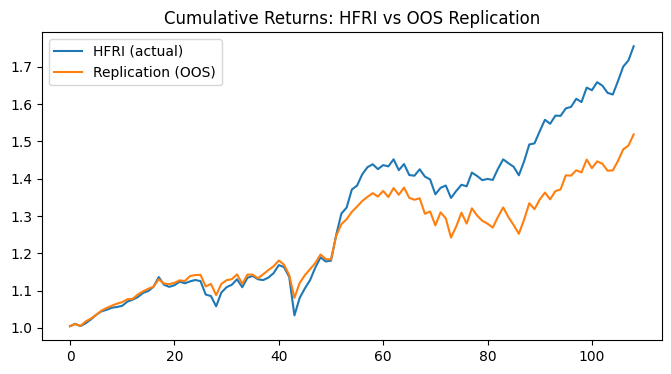

In [174]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
ax.plot((1+target_df[t_name][60:].to_numpy()).cumprod(), label='HFRI (actual)')
ax.plot((1+np.array(oos)).cumprod(), label='Replication (OOS)')
ax.set_title("Cumulative Returns: HFRI vs OOS Replication")
ax.legend()
plt.show()

---

# 3. EXTRA - Other Estimations

### 1.

In `Section 2`, we estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\text{hfri}}_{t} &= \alpha^{merr} + x_{t}^{\text{merr}}\beta^{\text{merr}} + \epsilon_{t}^{\text{merr}}\\[5pt]
\check{r}^{\text{hfri}}_{t} &= \check{\alpha}^{\text{merr}} + x_{t}^{\text{merr}}\check{\beta}^{\text{merr}}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\text{merr}}$?

* the mean of the fitted value, $\check{r}^{\text{hfri}}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\text{hfri}}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\text{hfri}}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

### 2.

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

# 4. EXTRA - Other Decompositions

### 1. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

### 2. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

### 3.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***